 # **Capitulo 1**

# 1. Búsqueda de conectores clave

### Datos: **lista** de `usuarios` de la empresa

In [ ]:
#  variable = Lista => diccionario 
#  variable = [{}] 
#  variable = [ {llave : valor, llave : valor}, {llave : valor, llave : valor},..., {llave : valor, llave : valor} ]
#* usuarios = [ {"id" : "valor_id", "nombre" : "valor_nombre"} ]

usuarios = [
    { "id": 0, "nombre": "Hero" },
    { "id": 1, "nombre": "Dunn" },
    { "id": 2, "nombre": "Sue" },
    { "id": 3, "nombre": "Chi" },
    { "id": 4, "nombre": "Thor" },
    { "id": 5, "nombre": "Clive" },
    { "id": 6, "nombre": "Hicks" },
    { "id": 7, "nombre": "Devin" },
    { "id": 8, "nombre": "Kate" },
    { "id": 9, "nombre": "Klein" }
]

### Datos: **lista** por pares de id\`s que representa las `amistades_pares` 

In [ ]:
# variable = lista => tupla
# variable = [()]
# variable = [ (valor_1, valor_2), (valor_1, valor_2), ..., (valor_1, valor_2) ]
#* amistades_pares = [ (usuario_id, usuario_id) ]

amistades_pares = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
                    (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

### Ilustracion de la red de amigos de **DataScencecester**

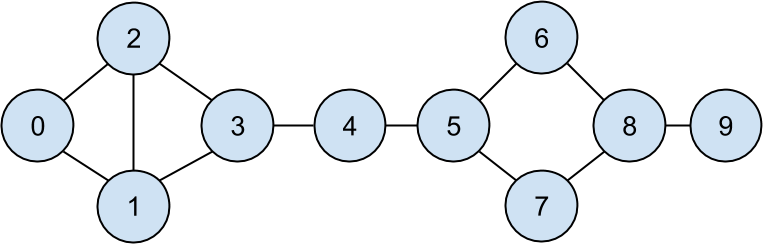

### Una lista de parejas no es la forma mas facil de trabajar

`[(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),(4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]`

In [ ]:
usuario = 1
print("amistades del usuario " + str(usuario)+": ")

for i, j in amistades_pares:    # obtenemos los id de los usuarios que estan en la amistad par                 
    if usuario in (i, j):       # ¿el usuario está en esa amistad? 
        if i != usuario:        # si el primer id no soy yo mismo
            print(i)                # entonces es mi amigo    
        elif j != usuario:      # si el segundo id no soy yo mismo
            print(j)                # entonces es mi amigo

#### Mejor usemos un `dict`

Buscar las cosas en un `dict` es muy rapido: 
- - - -
**dict**: 
`{llave : valor}`

`{ usuario_id : [amigo_id,...,amigo_id] }`

In [ ]:
# Inicializamos el diccionario con una lista vacía para cada ID de usuario:
# amistades = { 1 : [],..., usuario_id : [] }

amistades = {usuario["id"]: [] for usuario in usuarios}

`amistades = {usuario["id"]: [] for usuario in usuarios}` equivale a:
- - - -
~~~
amistades = {}
for usuario in usuarios:
    amistades[usuario['id']] = []
~~~

In [ ]:
amistades = {}
for usuario in usuarios:
    amistades[usuario['id']] = []

In [ ]:
# Ahora recorremos las parejas de amistad para llenar cada usuario con su amigo:

for i, j in amistades_pares:
    amistades[i].append(j)  # añadismos j como amigo del usuario i
    amistades[j].append(i)  # añadismos i como amigo del usuario j

In [ ]:
amistades

#### Comparacion entre una lista de parejas y un `dict`

~~~
amistades_pares =[ (0, 1), (0, 2), ..., (7, 8), (8, 9) ]

amistades = { 0: [1, 2], 1: [0, 2, 3],..., 8: [6, 7, 9], 9: [8] }
~~~

In [ ]:
usuario = 1
print("amistades del usuario "+str(usuario)+": ")

for i, j in amistades_pares:    # obtenemos los id de los usuarios que estan en la amistad par                 
    if usuario in (i, j):       # ¿el usuario está en esa amistad? 
        if i != usuario:        # si el primer id no soy yo mismo
            print(i)                # entonces es mi amigo    
        elif j != usuario:      # si el segundo id no soy yo mismo
            print(j)                # entonces es mi amigo

In [ ]:
amistades[1]

### ¿Cual es el número promedio de conexiones?

In [ ]:
# 1ro - Hallamos el numero total de conexiones

def numero_de_amigos(usuario):              
  """¿Cuantos amigos tiene _usuario_ ? """
  usuario_id = usuario["id"]                    # usuario_id = {"id" : 0, "nombre" : "Hero"}
  amigos_id = amistades[usuario_id]             #* amigos_id = amistades[0] ➡ amigos_id = [1, 2]
  return len(amigos_id)                         # 2

In [ ]:
print(numero_de_amigos(usuarios[0]))
print(numero_de_amigos(usuarios[1]))
print(numero_de_amigos(usuarios[2]))
print(numero_de_amigos(usuarios[3]))
print(numero_de_amigos(usuarios[4]))
print(numero_de_amigos(usuarios[5]))
print(numero_de_amigos(usuarios[6]))
print(numero_de_amigos(usuarios[7]))
print(numero_de_amigos(usuarios[8]))
print(numero_de_amigos(usuarios[9]))

##### `total_conexiones` es igual a la **suma** del numero de amigos de cada usuario

In [ ]:
total_conexiones = sum(numero_de_amigos(usuario) for usuario in usuarios)   #* sum(2+3+3+3+2+3+2+2+3+1)
total_conexiones                                                             

#### `promedio_conexion` es igual a la **suma** del numero de amigos de cada usuario **dividido** en el total de usuarios

In [ ]:
numero_usuarios = len(usuarios)                         # 10
promedio_conexion = total_conexiones/numero_usuarios    # 24/10
promedio_conexion

### ¿Quienes son las personas mas conectadas?

In [ ]:
# Creamos una lista de pares donde tengamos el usuario_id, numero_de_amigos
# num_amigos_por_id = [(usuario_id, numero_de_amigos), ..., (usuario_id, numero_de_amigos)]

num_amigos_por_id = [ (usuario["id"], numero_de_amigos(usuario)) for usuario in usuarios ]
print('numero de amigos por id: ' + str(num_amigos_por_id))

#### Ordenamos la lista de `num_amigos_por_id`

In [ ]:
num_amigos_por_id.sort(key=lambda ids_de_amigos : ids_de_amigos[1], reverse=True)   # ids_de_amigos = (0, 2)
print('numero de amigos ordenados por cantidad de amigos: ')
print(num_amigos_por_id)

#### Entendiendo la ordenacion

#### Otra manera de hacerlo - 1

In [ ]:
orden = lambda ids_de_amigos: ids_de_amigos[1]              # orden = lambda (0, 1) : 1

num_amigos_por_id.sort(key=orden, reverse=True)             # ids_de_amigos = (0, 2)
print('numero de amigos ordenados por cantidad de amigos: ')
print(num_amigos_por_id)

#### Otra manera de hacerlo - 2

In [ ]:
def orden(ids_de_amigos):
    return ids_de_amigos[1]

num_amigos_por_id.sort(key=orden, reverse=True)             # ids_de_amigos = (0, 2)
print('numero de amigos ordenados por cantidad de amigos: ')
print(num_amigos_por_id)

#### Ejemplo 1 para entender `key` con `lambda` en el metodo `sort`

In [ ]:
# estudiantes = [('nombre', 'calificacion', 'edad')]
estudiantes = [
    ('john', 'A', 15),
    ('jane', 'C', 12),
    ('dave', 'B', 10),
]
estudiantes.sort(key=lambda estudiante:estudiante[1])
print(estudiantes)

#### Ejemplo 2 para entender `key` en el metodo `sort` con funciones

In [ ]:
palabras = [
    'a',
    'abcde',
    'abcdef',
    'ghi',
    'kl'
]
palabras.sort(key= len, reverse=True)
print(palabras)

### Conclusión

##### degree centrality: grado de centralidad

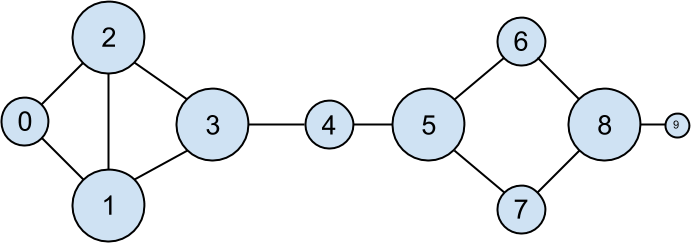

# 2. Científicos de datos que puede conocer

### Ejecutar codigo antes de empezar las practicas

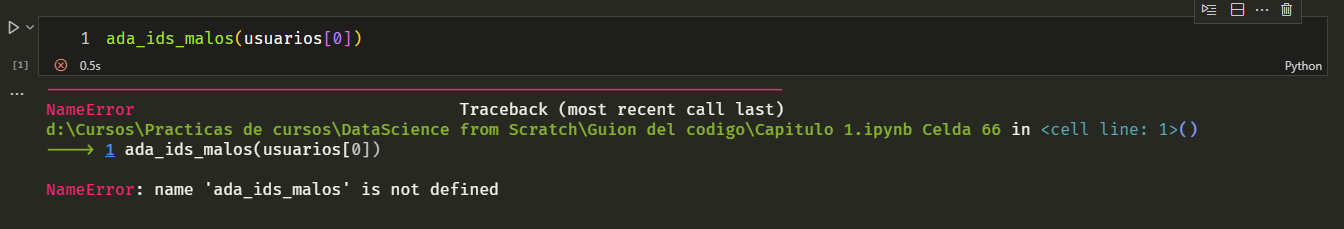

### Analicemos el diagrama

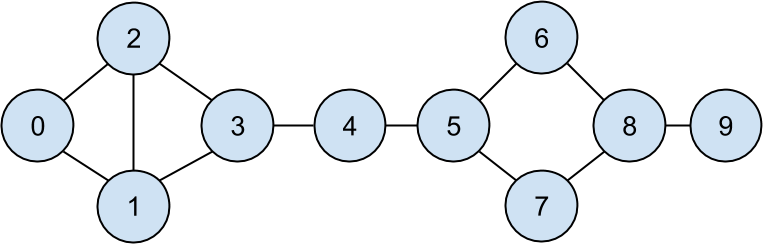

### `id` de los amigos de mis amigos.

In [ ]:
def ada_ids_malos(usuario):
    """ada es una abreviatura de "los Amigos De mis Amigos" """
    
    return[ada_id                                       # [ ] 
            for amigo_id in amistades[usuario['id']]    # amigos del usuario 0 = [1, 2]
            for ada_id in amistades[amigo_id]           # amigos del usuario 1 = [0,2,3], 2 = [0,1,3]
    ]

In [ ]:
ada_ids_malos(usuarios[0])

#### Ejemplo con el `id` del usuario `1`

In [ ]:
print(amistades[0])  
print(amistades[1])  # [0, 2, 3]
print(amistades[2])  
print(amistades[3])  

##### ¿Qué devolveria la función `ada_ids_malos`?


`ada_ids_malos` = `[ 1, 2, 0, 1, 3, 1, 2, 4 ]`

In [ ]:
# Hagamos la prueba
ada_ids_malos(usuarios[1])

[1, 2]
[0, 2, 3]
[0, 1, 3]
[1, 2, 4]

#### ¿Cómo sería el algoritmo para que devolviera solo los amigos de mis amigos que no conozco y que no sea yo mismo?

----
1. ¿Conoce el `usuario 1` a los amigos del `id 0`?
    * el 1ro es el mismo usuario
    * y el 2do ya lo conoce
    * entonces **NO** deberiamos guardar o almacenar algun id para posiblemente lo conozca o recomiende
2. ¿Conoce el `usuario 1` a los amigos del `id 2`?
    * el cero ya lo conoce
    * el 1ro es el mismo usuario
    * el 3ro ya lo conoce
    * entonces **NO** deberiamos guardar o almacenar algun id para posiblemente lo conozca o recomiende
3. ¿Conoce el `usuario 1` a los amigos del `id 3`?
    * el 1ro es el mismo usuario
    * el 2do ya lo conoce
    * el 4to NO lo conoce
    * entonces, **deberiamos** guardar el id que no conoce, Y lo agregamos a la lista para que posiblemente lo conozca o poder recomendarlo 


#### Recuentos de amigos en común

In [ ]:
from collections import Counter                 # El Modulo No está cargado por defecto

def amigos_de_amigos(usuario):                  # usuario: {"id":0, "nombre":"Hero"}
    usuario_id = usuario['id']
    return Counter(                             #! [{ amigo_de_amigo: amigos_en_comun,..., amigo_de_amigo: amigos_en_comun }]
        ada_id
        for amigo_id in amistades[usuario_id]   # Para cada uno de mis amigos,  # *| amigos del usuario 0 = [1, 2]
        for ada_id in amistades[amigo_id]       # Buscamos sus amigos           # *| 1 = [0,2,3], 2 = [0,1,3] => [0, 2, 3, 0, 1, 3]
        if ada_id != usuario_id                 # Que no sea yo                 # *| [2, 3, 1, 3]
        and ada_id not in amistades[usuario_id] # y que no sean mis amigos      # *| [3, 3] 
    )

print(amigos_de_amigos(usuarios[0]))            

#### Amigo de los amigos del usuario 3 (Chi) 

In [ ]:
amigos_de_amigos(usuarios[3])

##### Verificamos

In [ ]:
print(amistades[1])  # [0, 2, 3]
print(amistades[2])  # [0, 1, 3]
print(amistades[3])  # * [1, 2, 4]
print(amistades[4])  # [3, 5]
Counter([0,0,5])

## Intereses personales

### Datos: **lista** de `intereses` de los usuarios la empresa

In [ ]:
# intereses = [(usuario_id, interes), ...,(usuario_id, interes)]
intereses = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

#### Analicemos el grafico 

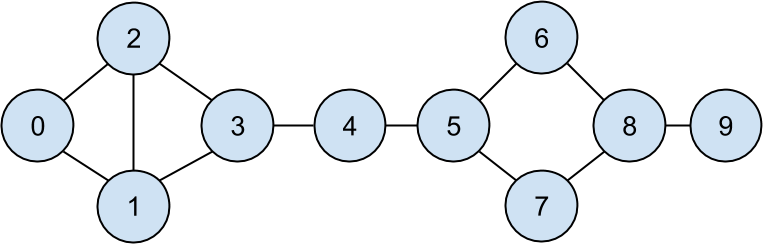

##### Amistades de **Hero** y **Klein**

In [ ]:
print(amistades[0])
print(amistades[9])

##### Amigos de amigos de **Hero** y **Klein**

In [ ]:
print(amigos_de_amigos(usuarios[0]))
print(amigos_de_amigos(usuarios[9]))
#print(amigos_de_amigos(usuarios[6]))

### `usuarios` con `intereses` similares

In [ ]:
def cientificos_de_datos_que_les_gusta(interes_objetivo):
    """Buscamos los ids de los usuarios que les gusta un __interes_objetivo__"""
    return[usuario_id
            for usuario_id, usuario_interes in intereses        # Recorremos los intereses, y 
            if usuario_interes == interes_objetivo              # buscamos si el usuario tiene el mismo interes que estoy buscando
    ]

In [ ]:
print(cientificos_de_datos_que_les_gusta(intereses[3][1]))
print(cientificos_de_datos_que_les_gusta('Java'))
print(cientificos_de_datos_que_les_gusta('java'))

#### Indice de **interes** por `usuarios`

In [ ]:
from collections import defaultdict

In [ ]:

# * usuarios_ids_por_interes = { interes : [usuarios], interes : [usuarios], ..., interes : [usuarios] }

usuarios_ids_por_interes = defaultdict(list)            # Por cada interes, vamos a tener una lista de usuarios

for usuario_id, interes in intereses: # (0, "Java")
    usuarios_ids_por_interes[interes].append(usuario_id)

usuarios_ids_por_interes

#### Indice de **usuario** por `intereses`

In [ ]:

# * intereses_por_usuario_id = { usuario : [intereses], usuario : [intereses], ..., usuario : [intereses] }

intereses_por_usuario_id = defaultdict(list)    # Por cada usuario, vamos a tener una lista de intereses

for usuario_id, interes in intereses:
    intereses_por_usuario_id[usuario_id].append(interes)

intereses_por_usuario_id

#### EJERCICIO: Para entender por ustedes mismos `defaultdict` [Link de referencia](https://www.geeksforgeeks.org/defaultdict-in-python/)

Si quieren probar el ¿por que no lo hacemos con un diccionario o con una lista?, dejo este codigo para que ustedes mismos se den cuenta los errores y lo facil que es trabajar con `defaultdict`.

Ejercicio con un `dict = { }` sin usar `defaultdict`

**1ro** Ejecuta el siguiente bloque

##### `usuarios_ids_por_interes_ejercicio`

In [ ]:
# esto al ejecutarlo nos sale bien ¿verdad?
# usuarios_ids_por_interes_ejercicio = { [ interes : [usuarios] ], [ interes : [usuarios] ], ..., [ interes : [usuarios] ],  }

usuarios_ids_por_interes_ejercicio = {interes[1] : []               # Estamos tomando como llave el indice 1 de cada interes, ya que en este indice está el nombre
                                        for interes in intereses}
for usuario_id, interes in intereses:
    usuarios_ids_por_interes_ejercicio[interes].append(usuario_id)

#usuarios_ids_por_interes_ejercicio

# ahora descomenta la siguiente linea y comenta la linea 9
#usuarios_ids_por_interes_ejercicio[0]

# ¿error verdad?, 
# ! KeyError: 0 ➡ estamos buscando en el dict la llave que sea igual a 0
# y recuerda que las llaves para usuarios_ids_por_interes_ejercicio son el nombre de los intereses, vuelve a comentar la linea 12

# descomenta la siguiente linea
#usuarios_ids_por_interes_ejercicio["Java"]
# ¿lo pillas ahora?, Recuerda que las llaves son sensibles a mayusculas y minusculas, prueba con 'J' minuscula 😉

#¿Que pasa si pasamos un indice que no existe? probemos con "Laravel", descomenta la siguiente linea
#usuarios_ids_por_interes_ejercicio["Laravel"]
# ! KeyError: 'Laravel' ➡ no encuentra la llave 'Laravel', ¿Sucederá esto mismo con un defaultdict 🤔? Pruebalo arriba,en el bloque donde importamos defaultdict 👍
# !  ➡ Te daraas cuenta que no devuelve error, lo que devuelve es una lista vacía
# * ENTONCES POR ESO ES RECOMENDABLE USAR defaultdict, 
# * YA QUE MANEJA ESOS ERRORES POR DEFAULT. 
# * SI NO LE PASAMOS POR PARAMETRO EL ¿CÓMO SE VA A COMPORTAR CUANDO SUCEDA UN keyError?, 
# * ENTONCES ESTAREMOS CREANDO UN DICCIONARIO COMO NORMALMENTE LO HARIAMOS CON LAS { }

##### `intereses_por_usuario_id_ejercicio`

In [ ]:
# esto al ejecutarlo nos sale bien ¿verdad?
# intereses_por_usuario_id_ejercicio = { [ usuario : [intereses] ], [ usuario : [intereses] ], ..., [ usuario : [intereses] ],  }

intereses_por_usuario_id_ejercicio = {usuario['id'] : [] for usuario in usuarios}

for usuario_id, interes in intereses:
    intereses_por_usuario_id_ejercicio[usuario_id].append(interes)
    
intereses_por_usuario_id_ejercicio

# ahora descomenta la siguiente linea y comentamos la linea 9
#intereses_por_usuario_id_ejercicio[0]

# Ya no aparece error como en el bloque anterior ¿verdad?,
# por que  recuerda que las llaves para intereses_por_usuario_id_ejercicio son el id de los usuarios. 🆗

#¿Que pasa si pasamos un indice que no existe? probemos con 10
# descomenta la siguiente linea
#intereses_por_usuario_id_ejercicio[10]
# ! KeyError: 10 ➡ no encuentra la llave 10, ¿Sucederá esto mismo con un defaultdict 🤔? Pruebalo arriba, en el bloque donde importamos defaultdict 👍
# !  ➡ Te daraas cuenta que no devuelve error, lo que devuelve es una lista vacía
# * ENTONCES POR ESO ES RECOMENDABLE USAR defaultdict, 
# * YA QUE MANEJA ESOS ERRORES POR DEFAULT. 
# * SI NO LE PASAMOS POR PARAMETRO EL ¿CÓMO SE VA A COMPORTAR CUANDO SUCEDA UN keyError?, 
# * ENTONCES ESTAREMOS CREANDO UN DICCIONARIO COMO NORMALMENTE LO HARIAMOS CON LAS { }

#### Con las lista que hemos creado de `usuarios_ids_por_interes` e `intereses_por_usuario_id`, 

podemos entonces encontrar quien tiene más intereses en común con un usuario determinado.

1. Iterar sobre los intereses del usuario. 
2. Para cada interés, repita sobre los otros usuarios con ese interés.
3. Llevar la cuenta de cuántas veces vemos el usuario.

In [ ]:
def intereses_mas_comunes_con(usuario):                                     # usuario = {"id":0, "nombre":"Hero"}
    """¿Que usuarios tienen más intereses en comun con _usuario_ ?"""
    return Counter(usuario_interesado_id                                    # Counter(9, 8, 9, 1, 5, 9, 1)
        for interes in intereses_por_usuario_id[usuario['id']]              # Counter({usuario_interesado: #intereses})
        for usuario_interesado_id in usuarios_ids_por_interes[interes]
        if usuario_interesado_id != usuario['id']
    )

print(intereses_mas_comunes_con(usuarios[0]))                           
# print(intereses_mas_comunes_con(usuarios[0])[8])                      

`Hero` (`id` 0), es mas probable que cree una conexion con `Klein` (`id` 9), ya que tienen mas interes comunes que  `Dunn` (`id` 1) e incluso aun mas que con `Kate` (`id` 8) y `Clive` (`id` 5)

# 3. Experiencia y salarios

### Datos: **Conjunto** de `salarios_y_experiencia` de los usuarios (Anónima)

In [ ]:
# salarios_y_experiencia = [ (salarios, años_experiencia),...,(salarios, años_experiencia) ]
salarios_y_experiencia = [(83000, 8.7), (88000, 8.1),
                          (48000, 0.7), (76000, 6),
                          (69000, 6.5), (76000, 7.5),
                          (60000, 2.5), (83000, 10),
                          (48000, 1.9), (63000, 4.2)]

### Salarios por años de experiencia (Grafico)

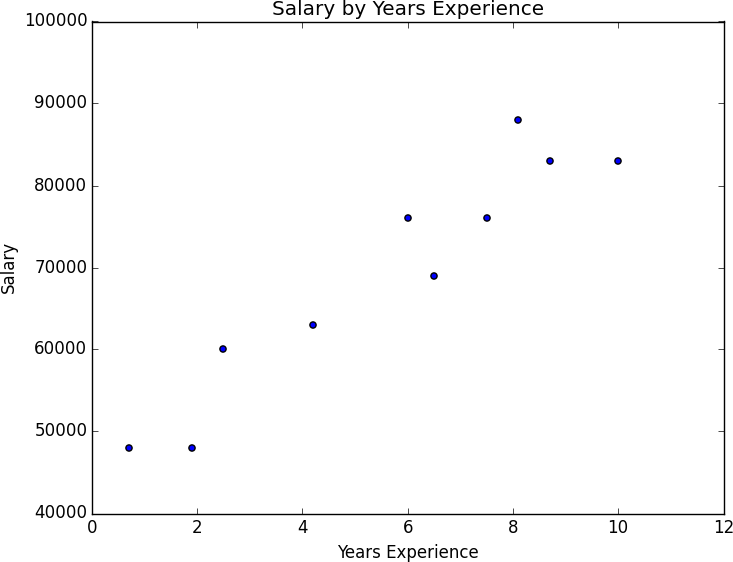

### ¿Cúal es el `salario` promedio para cada `experiencia`?

In [ ]:
from collections import defaultdict

# slario_por_experiencia = {experiencia:[salarios],...experiencia:[salarios]}
salario_por_experiencia = defaultdict(list)

for salario, experiencia in salarios_y_experiencia:
    salario_por_experiencia[experiencia].append(salario)

# promedio_del_salario_por_experiencia = {experiencia : salario_primedio}
promedio_del_salario_por_experiencia = { experiencia : sum(salario)/len(salario)
                                         for experiencia, salario in salario_por_experiencia.items()
}

In [ ]:
promedio_del_salario_por_experiencia

### ¿Cómo hacemos que sean utiles los años de experiencia?

In [ ]:
def cubo_de_experiencia(anio_de_experiencia):
    if anio_de_experiencia < 2:
        return 'menor a dos años'
    elif anio_de_experiencia < 5:
        return 'entre dos y cinco años'
    else:
        return 'más de cinco años'

### Agrupando campos

In [ ]:
# salario_por_cubo_de_experiencia = {experiencia: [salario],..., experiencia: [salario]}
salario_por_cubo_de_experiencia = defaultdict(list)

for salario, experiencia in salarios_y_experiencia:
    cubo = cubo_de_experiencia(experiencia)
    salario_por_cubo_de_experiencia[cubo].append(salario)

In [ ]:
salario_por_cubo_de_experiencia

#### comparacion con `salario_por_experiencia`

In [ ]:
salario_por_experiencia

### Promedio salarial

In [ ]:
# promedio_salarial_por_cubo = [rango_experiencia : promedio_salarial]

promedio_salarial_por_cubo = {
    rango_experiencia : sum(salario)/len(salario)
    for rango_experiencia,salario in salario_por_cubo_de_experiencia.items()
}

In [ ]:
promedio_salarial_por_cubo

### porcentaje de diferencia

#### porcentaje de diferencia = $|\frac{valor nuevo - valor anterior} {valor anterior}| \times 100 $

In [ ]:
ganancia = (promedio_salarial_por_cubo['más de cinco años']-promedio_salarial_por_cubo['menor a dos años'])/promedio_salarial_por_cubo['menor a dos años']
ganancia*100

# 4. Cuentas pagadas

## Datos: Estado de las cuentas dependiendo de los años en la empresa

In [1]:
anios_experiencia_estado_cuenta = [ (0.7, 'pagado'),
                                    (1.9, 'no pagado'),
                                    (2.5, 'pagado'),
                                    (4.2, 'no pagado'),
                                    (6.0, 'no pagado'),
                                    (6.5, 'no pagado'),
                                    (7.5, 'no pagado'),
                                    (8.1, 'no pagado'),
                                    (8.7, 'pagado'),
                                    (10.0,'pagado')]

## Modelo pagado y no pagado

In [2]:
def predecir_pagado_o_no_pagado(anios_experiencia):
    if anios_experiencia < 3.0:
        return "pagado"
    elif anios_experiencia < 8.5:
        return 'no pagado'
    else:
        return 'pagado'

### Agrupando los estados

In [3]:
from collections import defaultdict

estados_de_cuenta = defaultdict(list)

for experiencia, cuenta in anios_experiencia_estado_cuenta:
    estado = predecir_pagado_o_no_pagado(experiencia)
    estados_de_cuenta[estado].append(cuenta)

estados_de_cuenta

defaultdict(list,
            {'pagado': ['pagado', 'no pagado', 'pagado', 'pagado', 'pagado'],
             'no pagado': ['no pagado',
              'no pagado',
              'no pagado',
              'no pagado',
              'no pagado']})

### Contando los estados

In [4]:
from collections import Counter

cantidad_estados_de_cuenta = Counter([predecir_pagado_o_no_pagado(experiencia) 
                                     for experiencia, estado in anios_experiencia_estado_cuenta])


cantidad_estados_de_cuenta

Counter({'pagado': 5, 'no pagado': 5})

### Promedio de los estados

In [5]:
promedio_estados_de_cuenta = {estado : cantidad_estados_de_cuenta[estado]/len(anios_experiencia_estado_cuenta) 
                              for estado in cantidad_estados_de_cuenta}

promedio_estados_de_cuenta

{'pagado': 0.5, 'no pagado': 0.5}

## Tarea

### Colocar al inicio de cada bloque un comentarios que describa como esta conformada la variable, borra los resultados de las celdas e intenta predecir de manera general como sera la estructura de esa variable. La idea es ayudarte a comprender los tipos de estructuras y afianzar los conociemientos de las mismas, EJ: 

In [6]:
# promedio_estados_de_cuenta = { estado : promedio,...,estado : promedio }

promedio_estados_de_cuenta = {estado : cantidad_estados_de_cuenta[estado]/len(anios_experiencia_estado_cuenta) 
                              for estado in cantidad_estados_de_cuenta}

# 5. Temas de interes

## Datos: Intereses de los usuarios

In [7]:
intereses = [
    (0, "Hadoop"), (0, "Big Data"), (0, "HBase"), (0, "Java"),
    (0, "Spark"), (0, "Storm"), (0, "Cassandra"),
    (1, "NoSQL"), (1, "MongoDB"), (1, "Cassandra"), (1, "HBase"),
    (1, "Postgres"), (2, "Python"), (2, "scikit-learn"), (2, "scipy"),
    (2, "numpy"), (2, "statsmodels"), (2, "pandas"), (3, "R"), (3, "Python"),
    (3, "statistics"), (3, "regression"), (3, "probability"),
    (4, "machine learning"), (4, "regression"), (4, "decision trees"),
    (4, "libsvm"), (5, "Python"), (5, "R"), (5, "Java"), (5, "C++"),
    (5, "Haskell"), (5, "programming languages"), (6, "statistics"),
    (6, "probability"), (6, "mathematics"), (6, "theory"),
    (7, "machine learning"), (7, "scikit-learn"), (7, "Mahout"),
    (7, "neural networks"), (8, "neural networks"), (8, "deep learning"),
    (8, "Big Data"), (8, "artificial intelligence"), (9, "Hadoop"),
    (9, "Java"), (9, "MapReduce"), (9, "Big Data")
]

## Algoritmo para hallar los temas de interes más populares

1. Debemos colocar cada palabra en minúscula ya que diferentes usuarios pueden escribirlo de distinta manera
2. dividimos las que estan compuestas por dos palabras como artificial intelligence, deep learning etc.
3. contamos los resultados

### Contando palabras

In [8]:
from collections import Counter
palabras_y_cuentas = Counter(palabra
                            for usuario, interes in intereses
                            for palabra in interes.lower().split() 
                                )

palabras_y_cuentas

Counter({'hadoop': 2,
         'big': 3,
         'data': 3,
         'hbase': 2,
         'java': 3,
         'spark': 1,
         'storm': 1,
         'cassandra': 2,
         'nosql': 1,
         'mongodb': 1,
         'postgres': 1,
         'python': 3,
         'scikit-learn': 2,
         'scipy': 1,
         'numpy': 1,
         'statsmodels': 1,
         'pandas': 1,
         'r': 2,
         'statistics': 2,
         'regression': 2,
         'probability': 2,
         'machine': 2,
         'learning': 3,
         'decision': 1,
         'trees': 1,
         'libsvm': 1,
         'c++': 1,
         'haskell': 1,
         'programming': 1,
         'languages': 1,
         'mathematics': 1,
         'theory': 1,
         'mahout': 1,
         'neural': 2,
         'networks': 2,
         'deep': 1,
         'artificial': 1,
         'intelligence': 1,
         'mapreduce': 1})

### Palabras que más se repiten

In [13]:
for palabra, cuenta in palabras_y_cuentas.most_common():
    if cuenta > 1:
        print(palabra, cuenta)

big 3
data 3
java 3
python 3
learning 3
hadoop 2
hbase 2
cassandra 2
scikit-learn 2
r 2
statistics 2
regression 2
probability 2
machine 2
neural 2
networks 2
